# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
df=pd.read_csv("fraud.csv")

In [2]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3739915,278,CASH_IN,51505.68,C2125882552,4553531.14,4605036.82,C1857547706,59001.51,7495.83,0,0
6038098,478,PAYMENT,10509.46,C506607816,230321.00,219811.54,M1212386358,0.00,0.00,0,0
1440690,140,PAYMENT,6906.34,C2041709017,153280.00,146373.66,M997870578,0.00,0.00,0,0
1161387,131,TRANSFER,135093.41,C1385696597,0.00,0.00,C54617902,8446179.65,8581273.05,0,0
2849129,227,CASH_OUT,50164.83,C447270617,0.00,0.00,C1700310826,160196.56,210361.39,0,0


# Q1. Data cleaning including missing values, outliers and multi-collinearity.

In [3]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [4]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [5]:
df[df['isFraud']==0].sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
596644,33,CASH_IN,237689.41,C945101377,13333957.64,13571647.05,C1518593791,277164.40,39474.99,0,0
5054013,354,CASH_IN,68467.11,C207193646,5003.00,73470.11,C187697734,296265.29,227798.19,0,0
5094118,355,PAYMENT,12499.63,C760628398,0.00,0.00,M1213124679,0.00,0.00,0,0
5840763,402,PAYMENT,25780.02,C1725232751,0.00,0.00,M1952003893,0.00,0.00,0,0
3872581,283,CASH_OUT,108584.14,C1005201785,228886.00,120301.86,C1389454341,99633.78,208217.93,0,0
4941976,350,CASH_OUT,145395.15,C747278269,82563.00,0.00,C1204015413,287120.22,432515.37,0,0
3639695,275,PAYMENT,16140.07,C1604824219,0.00,0.00,M1452815378,0.00,0.00,0,0
1646125,157,PAYMENT,26813.63,C1769492015,941.00,0.00,M856679271,0.00,0.00,0,0
1130914,131,CASH_OUT,416460.91,C1813971031,15621.00,0.00,C1374400803,171926.62,588387.52,0,0
3963617,297,CASH_OUT,187752.78,C1523352226,100313.00,0.00,C1518402355,27679.22,215432.00,0,0


In [6]:
df[df['isFraud']==1].sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1068588,120,CASH_OUT,746518.21,C321390440,746518.21,0.0,C467067146,348702.45,1095220.66,1,0
6281504,648,TRANSFER,398045.73,C1389887414,398045.73,0.0,C452478400,0.00,0.00,1,0
6201210,577,CASH_OUT,681525.62,C343064779,681525.62,0.0,C851594091,2250319.57,2931845.19,1,0
6283819,658,CASH_OUT,120582.86,C247557474,120582.86,0.0,C1026686567,322996.71,443579.57,1,0
6168710,560,CASH_OUT,357882.83,C151669603,357882.83,0.0,C1152228208,901329.73,1259212.55,1,0
1852939,164,CASH_OUT,276042.59,C2133722439,276042.59,0.0,C2121024241,734229.64,1010272.23,1,0
5128584,356,TRANSFER,5952739.30,C1569009550,5952739.30,0.0,C1429463996,0.00,0.00,1,0
90070,10,TRANSFER,93810.76,C481501970,93810.76,0.0,C1262577882,0.00,0.00,1,0
5188055,367,CASH_OUT,362672.57,C1069202179,362672.57,0.0,C1808434552,3.51,362676.08,1,0
1059565,105,CASH_OUT,539087.79,C1597812887,539087.79,0.0,C1452774204,44825.34,583913.14,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Visualise our dataset on the basis of type

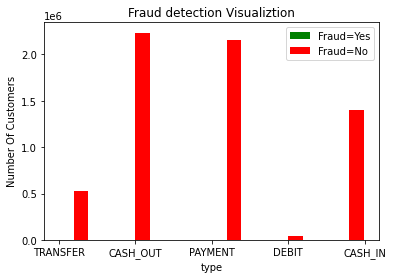

In [9]:
type_fraud_no = df[df.isFraud==0].type
type_fraud_yes = df[df.isFraud==1].type

plt.xlabel("type")
plt.ylabel("Number Of Customers")
plt.title("Fraud detection Visualiztion")


plt.hist([type_fraud_yes, type_fraud_no], rwidth=0.95, color=['green','red'],label=['Fraud=Yes','Fraud=No'])
plt.legend()

### Drop unnecessary columns

In [10]:
del df['nameOrig']              
del df ['nameDest'] 

### Convert column type to numeric

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['type'] = labelencoder.fit_transform(df['type'])
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [12]:
df.dtypes

step                int64
type                int32
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### Using smote to handle imbalanced dataset

In [13]:
X = df.drop('isFraud',axis='columns')
y = df['isFraud']

y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [14]:
!pip install imbalanced-learn

You are using pip version 9.0.3, however version 21.2.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    6354407
0    6354407
Name: isFraud, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [17]:
y_train.value_counts()

1    5083526
0    5083525
Name: isFraud, dtype: int64

In [18]:
X_train.shape

(10167051, 8)

In [19]:
X_test.shape

(2541763, 8)

In [20]:
len(X_train.columns)

8

### Build a model (ANN) in tensorflow/keras

In [21]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(8,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20,batch_size=100)

Epoch 1/20
101671/101671 [==============================] - 202s 2ms/step - loss: 101.7378 - accuracy: 0.6840
Epoch 2/20
101671/101671 [==============================] - 210s 2ms/step - loss: 0.4107 - accuracy: 0.8241
Epoch 3/20
101671/101671 [==============================] - 256s 3ms/step - loss: 0.4057 - accuracy: 0.8145
Epoch 4/20
101671/101671 [==============================] - 258s 3ms/step - loss: 0.3592 - accuracy: 0.8484
Epoch 5/20
101671/101671 [==============================] - 251s 2ms/step - loss: 0.3139 - accuracy: 0.8859
Epoch 6/20
101671/101671 [==============================] - 259s 3ms/step - loss: 0.3045 - accuracy: 0.8937
Epoch 7/20
101671/101671 [==============================] - 259s 3ms/step - loss: 0.3201 - accuracy: 0.8979
Epoch 8/20
101671/101671 [==============================] - 257s 3ms/step - loss: 0.3388 - accuracy: 0.8760
Epoch 9/20
101671/101671 [==============================] - 307s 3ms/step - loss: 0.3666 - accuracy: 0.8571
Epoch 10/20
101671/101671 

In [23]:
model.evaluate(X_test, y_test)

79431/79431 [==============================] - 60s 750us/step - loss: 0.0984 - accuracy: 0.9803 27s - loss: 0.0978 - accu - ETA: 26s - loss: 0.09 - ETA: 25s - loss: 0.0980 - accuracy: 0. - ETA: 24s - loss: 0.0980 - accuracy: - ETA: 24s - loss: 0.0979 - accuracy: 0 - ETA: 24s - loss: 0.0979 - ac - ETA: 22s -  - ETA: 17s - loss: 0.0981 - accuracy: 0.980 - ETA: 17s - loss: 0.0981 - accuracy: 0.980 - ETA: 17s  - ETA: 13s - l - ETA - ETA: 10s - loss: 0.0983 - accurac - ETA: 10s - loss: 0.098 - ETA: 1s - loss: 0.0983 - accuracy - ETA: 1s - loss: 0.0984 - ac - ETA: 1s - loss: 0.0984 - accuracy: 0.98 - - ETA: 0s - loss: 0.0983 - accura


[0.09836845844984055, 0.9803195595741272]

In [24]:
yp = model.predict(X_test)
yp[:5]

array([[5.183349e-10],
       [7.804543e-02],
       [9.794117e-01],
       [7.804543e-02],
       [9.794117e-01]], dtype=float32)

In [25]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [26]:
y_pred[:10]

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1]

In [27]:
y_test[:10]

4042811     0
313125      0
10357520    1
2759331     0
6524783     1
2356117     0
11516568    1
2626952     0
7216808     1
6410010     1
Name: isFraud, dtype: int64

# Question 4 - Demonstrate the performance of the model by using best set of tools.

In [28]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98   1270882
           1       0.98      0.98      0.98   1270881

    accuracy                           0.98   2541763
   macro avg       0.98      0.98      0.98   2541763
weighted avg       0.98      0.98      0.98   2541763



Text(69.0, 0.5, 'Truth')

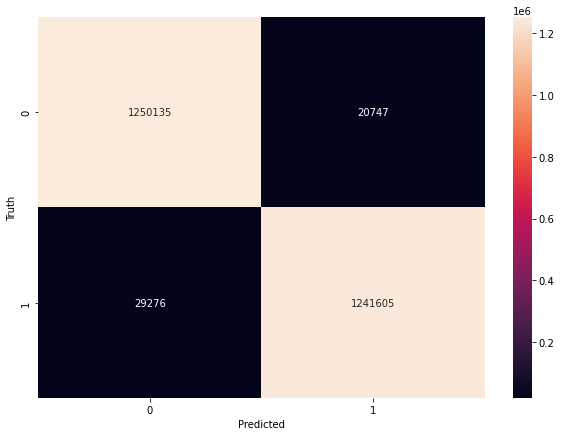

In [29]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
y_pred[-10:]

[1, 1, 0, 1, 0, 0, 0, 0, 1, 1]

In [31]:
y_test[-10:]

9354359     1
7431018     1
173729      0
11523364    1
5847346     0
3492354     0
3796441     0
1756927     0
8098484     1
6920147     1
Name: isFraud, dtype: int64

# Question 2 - Describe your fraud detection model in elaboration.

# Question 3 - How did you select variables to be included in the model?

# Question 5 - What are the key factors that predict fraudulent customer?

# Question 6 - Do these factors make sense? If yes, How? If not, How not?

Yes,these factors makes sense.
In our dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
Also there is relation between oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest according to type.

# Question 7 - What kind of prevention should be adopted while company update its infrastructure?

We all agree that we want quality infrastructure, because we know that quality reduces project risks, increases availability and durability over a project’s lifecycle, improves customer experience and as such makes the infrastructure worth the investment.

# Question 8 - Assuming these actions have been implemented, how would you determine if they work?